In [1]:
# ======================================================
# PCA - Dimensionality Reduction on the Iris Dataset
# ======================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [2]:
# --- Load Dataset ---
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
target_names = iris.target_names



In [3]:
# --- Standardize the Data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [4]:
# --- PCA with 2 Components ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)



In [5]:
# --- Explained Variance ---
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", np.sum(pca.explained_variance_ratio_))



Explained variance ratio: [0.72962445 0.22850762]
Total explained variance: 0.9581320720000166


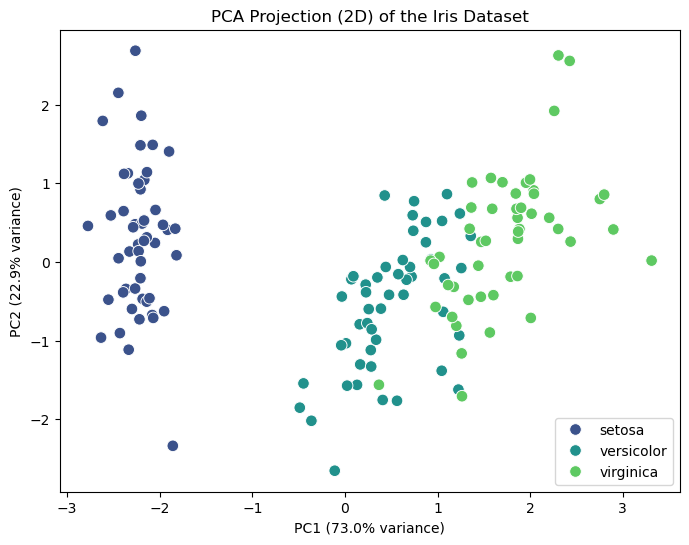

In [6]:
# --- 2D Visualization ---
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=target_names[y], s=70, palette='viridis')
plt.title("PCA Projection (2D) of the Iris Dataset")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.show()



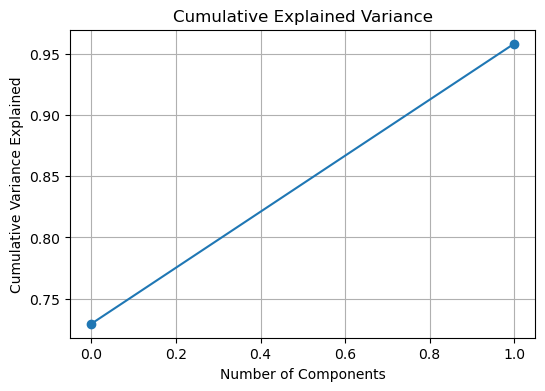

In [7]:
# --- Scree Plot ---
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid(True)
plt.show()



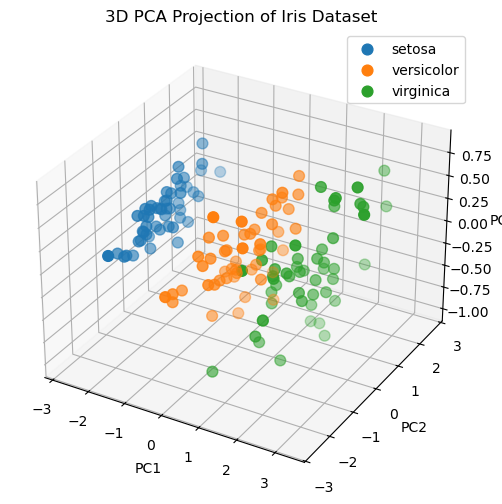

In [6]:
# --- PCA with 3 Components for 3D Visualization ---
from mpl_toolkits.mplot3d import Axes3D

pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
for i, name in enumerate(target_names):
    ax.scatter(X_pca3[y==i,0], X_pca3[y==i,1], X_pca3[y==i,2], label=name, s=60)
ax.set_title("3D PCA Projection of Iris Dataset")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend()
plt.show()



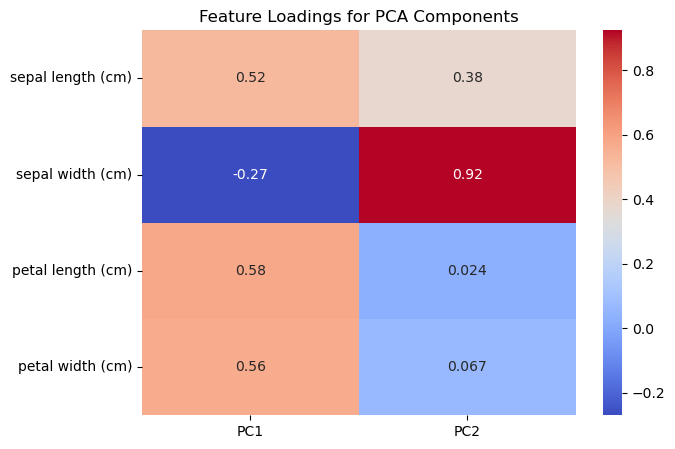

In [9]:
# --- Visualize Loadings (Feature Contribution to PCs) ---
loadings = pd.DataFrame(pca.components_.T, 
                        columns=['PC1', 'PC2'],
                        index=iris.feature_names)
plt.figure(figsize=(7,5))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title("Feature Loadings for PCA Components")
plt.show()
